In [31]:
import pandas as pd
import numpy as np

In [90]:
data = pd.read_csv("/home/tgraham/Documents/MSC/project_data/new_approach_data.csv",index_col=0)

In [91]:
data = data.drop(columns=["ActualCompletionDateTime","ExtractTimestamp","JobID","CentralAssetID"])

In [92]:
demo = data

In [93]:
demo

,FloodHotspot,RouteID,ParameterValueID,Failure_or_Maintenance,prefix,full_failure,covered_failure,broken_failure,Days_Since_Maintenance,Previous_pvalue,Previous_type_of_maintenance
15458,0,1101,0-25,0,NW13,0,0,0,0.0,0-25,Emptying
15460,0,1101,2550,0,NW13,0,0,0,0.0,2550,Emptying
15462,0,1101,2550,0,NW13,0,0,0,0.0,2550,Emptying
15464,0,1101,2550,0,NW13,0,0,0,0.0,2550,Emptying
15466,1,1101,2550,0,NW13,0,0,0,0.0,2550,Emptying
...,...,...,...,...,...,...,...,...,...,...,...
551199,0,M016,7510,0,NW10,0,0,0,258.0,2550,Emptying
551200,0,M016,7510,0,NW10,0,0,0,258.0,2550,Emptying
551201,1,M501,2550,0,SW21,0,0,0,262.0,5075,Non-Emptying
551202,1,M501,2550,0,SW21,0,0,0,262.0,5075,Non-Emptying


In [98]:
data = data.rename(columns={"prefix":"Region","ParameterValueID":"%Full","Previous_pvalue":"Previous_%Full"})

In [99]:
data

,FloodHotspot,RouteID,%Full,Failure_or_Maintenance,Region,full_failure,covered_failure,broken_failure,Days_Since_Maintenance,Previous_%Full,Previous_type_of_maintenance
15458,0,1101,0-25,0,NW13,0,0,0,0.0,0-25,Emptying
15460,0,1101,2550,0,NW13,0,0,0,0.0,2550,Emptying
15462,0,1101,2550,0,NW13,0,0,0,0.0,2550,Emptying
15464,0,1101,2550,0,NW13,0,0,0,0.0,2550,Emptying
15466,1,1101,2550,0,NW13,0,0,0,0.0,2550,Emptying
...,...,...,...,...,...,...,...,...,...,...,...
551199,0,M016,7510,0,NW10,0,0,0,258.0,2550,Emptying
551200,0,M016,7510,0,NW10,0,0,0,258.0,2550,Emptying
551201,1,M501,2550,0,SW21,0,0,0,262.0,5075,Non-Emptying
551202,1,M501,2550,0,SW21,0,0,0,262.0,5075,Non-Emptying


In [100]:
data["RouteID"] = data["RouteID"].astype(str)
data["Region"] = data["Region"].astype(str)
data["%Full"] = data["%Full"].astype(str)
data["Days_Since_Maintenance"] = data["Days_Since_Maintenance"].astype(int)

In [102]:
data["%Full"].unique()

array(['0-25', '2550', '7510', '5075', 'CLEA'], dtype=object)

In [52]:
def edit_paramaterValueID (value):
    param_dict = {
        "CLEA":0,
        "0-25":1,
        "2550":2,
        "5075":3,
        "7510":4
    }
    return param_dict[value]

In [103]:
data["%Full"] = data["%Full"].apply(edit_paramaterValueID)
data["Previous_%Full"] = data["Previous_%Full"].apply(edit_paramaterValueID)

In [104]:
struct_data = data.copy()
non_numeric_columns = list(struct_data.select_dtypes(exclude=[np.number]).columns)

print(non_numeric_columns)

['RouteID', 'Region', 'Previous_type_of_maintenance']


In [105]:
struct_data["RouteID"] = struct_data["RouteID"].apply(lambda x: "a" + str(x))

In [106]:
struct_data.RouteID.value_counts()

a1305    10723
a1803     8779
aM502     8187
a1812     7532
aM501     7268
         ...  
aA361        1
aA31G        1
aNO89        1
aA384        1
aE012        1
Name: RouteID, Length: 621, dtype: int64

In [107]:
data = data.drop(columns="RouteID")

In [108]:
struct_data = data.copy()
non_numeric_columns = list(struct_data.select_dtypes(exclude=[np.number]).columns)

print(non_numeric_columns)

['Region', 'Previous_type_of_maintenance']


In [109]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in non_numeric_columns:
    struct_data[col] = le.fit_transform(struct_data[col])

struct_data.head(5)

,FloodHotspot,%Full,Failure_or_Maintenance,Region,full_failure,covered_failure,broken_failure,Days_Since_Maintenance,Previous_%Full,Previous_type_of_maintenance
15458,0,1,0,7,0,0,0,0,1,0
15460,0,2,0,7,0,0,0,0,2,0
15462,0,2,0,7,0,0,0,0,2,0
15464,0,2,0,7,0,0,0,0,2,0
15466,1,2,0,7,0,0,0,0,2,0


In [110]:
def reduce_cardinality_of_dsm(days):
    if days >= 0 and days <=90:
        return int(0)
    elif days > 90 and days <= 180:
        return int(1)
    elif days > 180 and days <= 270:
        return int(2)
    elif days > 270 and days <= 360:
        return int(3)
    elif days > 360 and days <= 450:
        return int(4)
    elif days > 450 and days <= 540:
        return int(5)
    elif days > 540 and days <= 630:
        return int(6)
    elif days > 630 and days < 720:
        return int(7)
    elif days >= 720:
        return int(8) 

In [111]:
struct_data["Months_Since_Maintenance"] = struct_data["Days_Since_Maintenance"].apply(reduce_cardinality_of_dsm)

In [112]:
struct_data["Months_Since_Maintenance"].value_counts()

2    91505
1    76628
3    72725
4    71101
0    41118
5    29526
6    12903
7     9772
8     7982
Name: Months_Since_Maintenance, dtype: int64

In [113]:
struct_data[struct_data["Months_Since_Maintenance"].isna()]

,FloodHotspot,%Full,Failure_or_Maintenance,Region,full_failure,covered_failure,broken_failure,Days_Since_Maintenance,Previous_%Full,Previous_type_of_maintenance,Months_Since_Maintenance


In [114]:
struct_data = struct_data.drop(columns="Days_Since_Maintenance")

In [115]:
demo = struct_data

In [116]:
struct_data["Months_Since_Maintenance"].value_counts()

2    91505
1    76628
3    72725
4    71101
0    41118
5    29526
6    12903
7     9772
8     7982
Name: Months_Since_Maintenance, dtype: int64

## Gcastle Attempt

In [70]:
import os
os.environ['CASTLE_BACKEND'] = 'pytorch'

from collections import OrderedDict

import numpy as np
import networkx as nx

import castle
from castle.common import GraphDAG
from castle.metrics import MetricsDAG
from castle.datasets import IIDSimulation, DAG
from castle.algorithms import PC, GES, ICALiNGAM, GOLEM
from castle.common.priori_knowledge import PrioriKnowledge
import matplotlib.pyplot as plt

In [117]:
struct_data = struct_data.drop(columns="Failure_or_Maintenance")

In [72]:
mapped = {}
for index, item in enumerate(struct_data.columns):
    mapped[item]=index

In [73]:
forbidden_edges = [("%Full", "Previous_%Full"),
                    ("FloodHotspot", "Region"),
                    ("Months_Since_Maintenance","Previous_%Full"),
                    #("RouteID", "prefix"),
                    #("ParameterValueID","RouteID"),
                    ("%Full","Region"),
                    #("Previous_pvalue", "RouteID"),
                    ("Previous_%Full", "Region"),
                    #("FloodHotspot","RouteID"),
                    #("broken_failure","RouteID"),
                    ("broken_failure","Region"),
                    ("covered_failure","Region"),
                    #("covered_failure","RouteID"),
                    #("full_failure","RouteID"),
                    ("full_failure","Region"),
                  ("full_failure","Months_Since_Maintenance"),
                  ("covered_failure","Months_Since_Maintenance"),
                  ("broken_failure","Months_Since_Maintenance"),
                  ("full_failure","Previous_%Full"),
                  ("covered_failure","Previous_%Full"),
                  ("broken_failure","Previous_%Full")]

In [74]:
output = []
for item in forbidden_edges:
    output.append((mapped[item[0]],mapped[item[1]]))

In [75]:
priori = PrioriKnowledge(struct_data.shape[1])

In [76]:
priori.add_forbidden_edges(output)

In [77]:
# Build the model
pc = PC(variant='stable',priori_knowledge=priori,alpha=0.8)
pc.learn(struct_data)

# Print out the learned matrix
print(pc.causal_matrix)

[[0 0 0 1 1 0 1 1 1]
 [0 0 0 1 0 1 0 0 1]
 [1 1 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 1 0]
 [0 0 0 1 1 0 0 1 0]
 [0 1 0 1 0 1 0 1 1]
 [0 0 0 0 0 0 0 0 1]
 [0 0 0 1 1 1 0 0 0]]


In [78]:
list(struct_data.columns.values)

['FloodHotspot',
 'ParameterValueID',
 'prefix',
 'full_failure',
 'covered_failure',
 'broken_failure',
 'Previous_pvalue',
 'Previous_type_of_maintenance',
 'Months_Since_Maintenance']

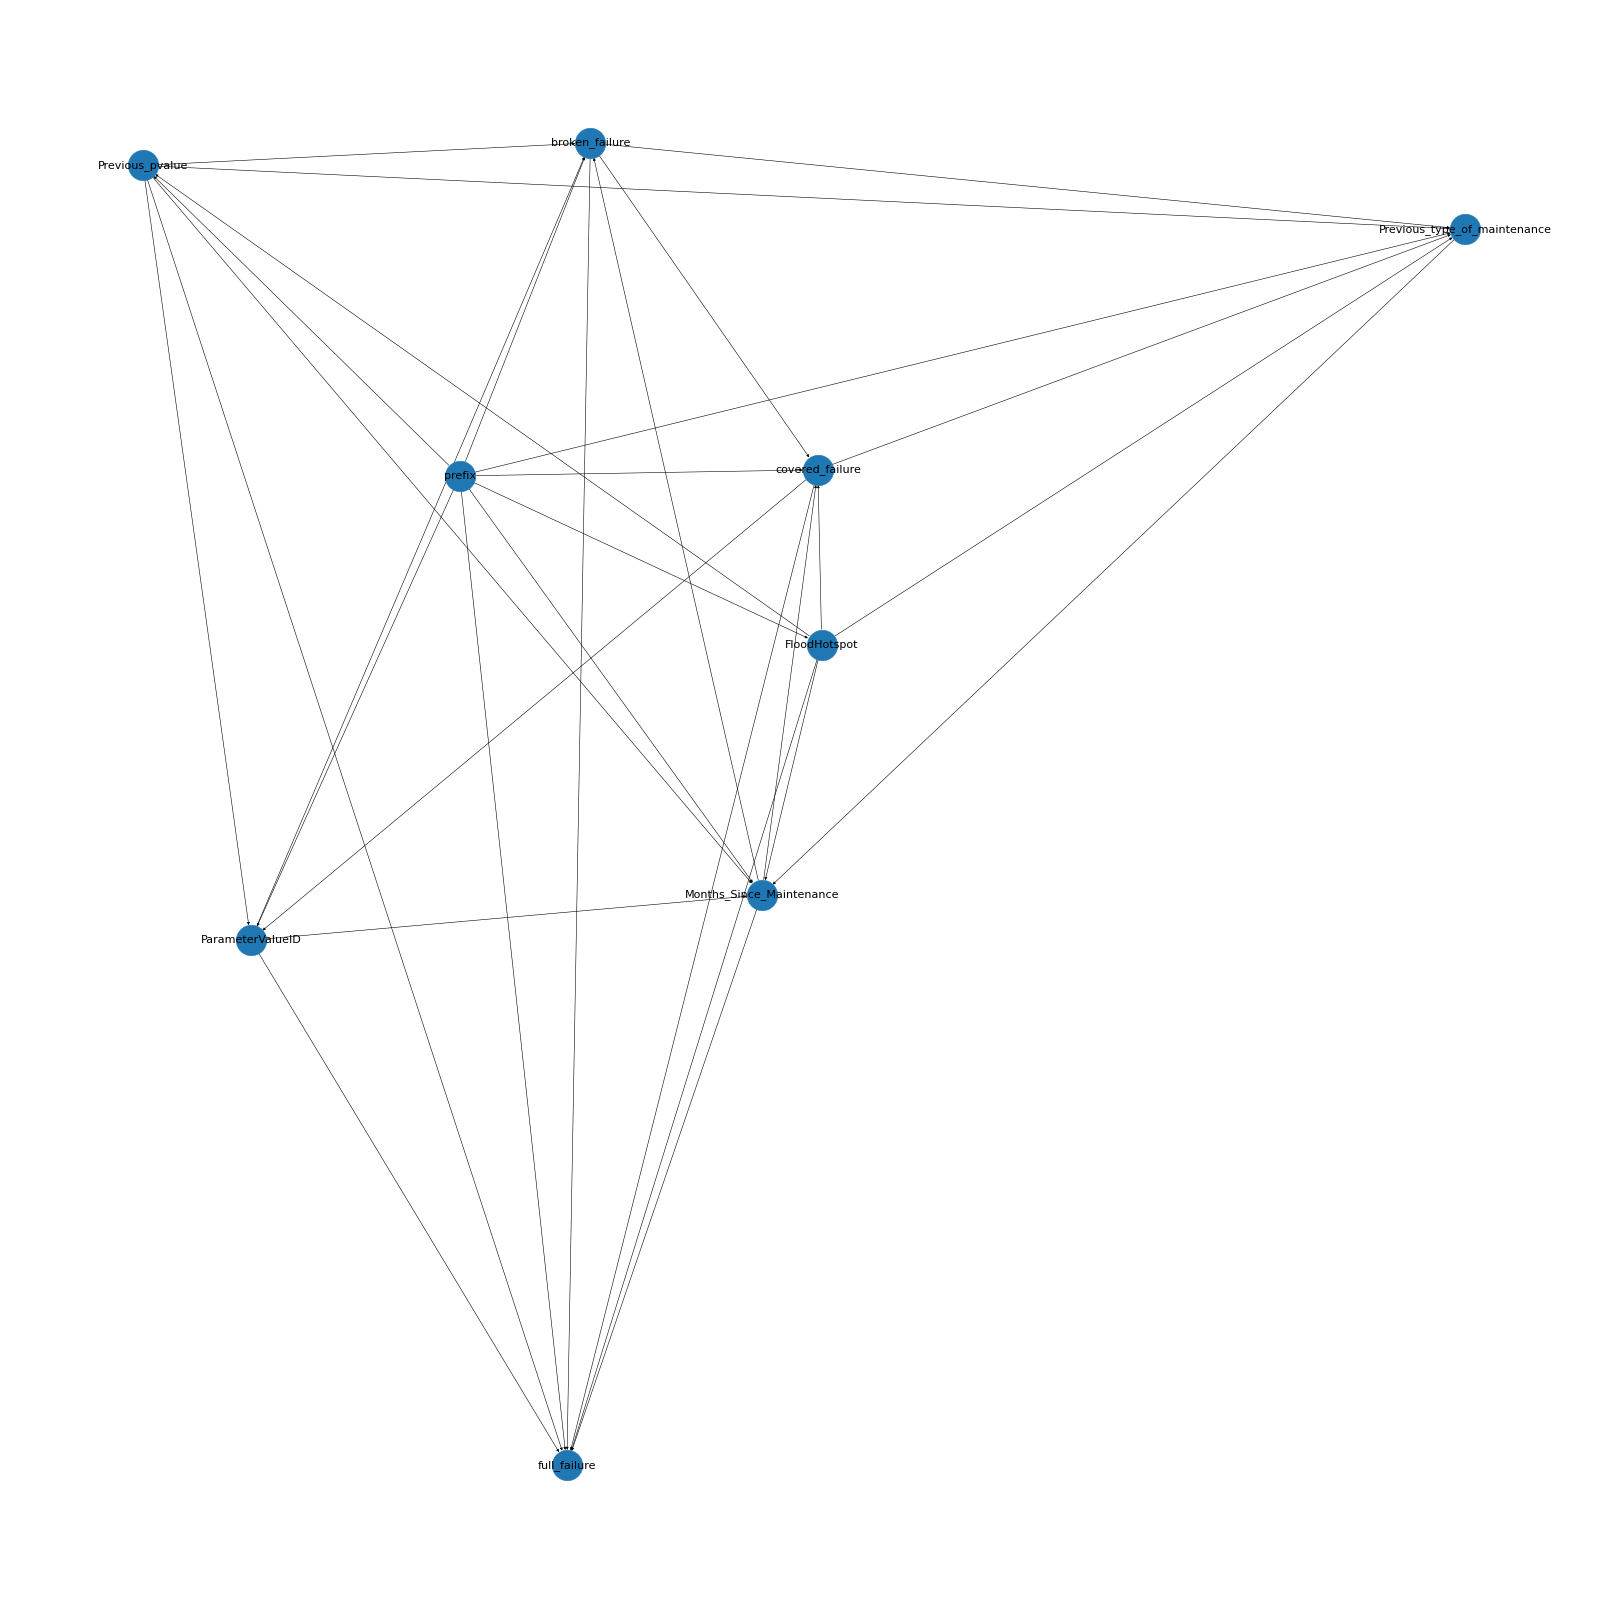

In [79]:
# Get learned graph
learned_graph = nx.DiGraph(pc.causal_matrix)

# Relabel the nodes
MAPPING = {k: v for k, v in zip(range(len(struct_data.columns)), list(struct_data.columns.values))}
learned_graph = nx.relabel_nodes(learned_graph, MAPPING, copy=True)
fig = plt.figure(1, figsize=(40, 40), dpi=40)

# Plot the graph
nx.draw(
    learned_graph, 
    with_labels=True,
    node_size=3000,
    font_size=20,
    font_color='black'
)
fig.savefig("causal_diagram_PC.png")

# CausalLearn Package

In [316]:
struct_data

,FloodHotspot,%Full,Region,full_failure,covered_failure,broken_failure,Previous_%Full,Previous_type_of_maintenance,Months_Since_Maintenance
15458,0,1,7,0,0,0,1,0,0
15460,0,2,7,0,0,0,2,0,0
15462,0,2,7,0,0,0,2,0,0
15464,0,2,7,0,0,0,2,0,0
15466,1,2,7,0,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...
551199,0,4,6,0,0,0,2,0,2
551200,0,4,6,0,0,0,2,0,2
551201,1,2,10,0,0,0,3,1,2
551202,1,2,10,0,0,0,3,1,2


## GES

In [419]:
from causallearn.search.ScoreBased.GES import ges
score_func = "local_score_BDeu"
Record = ges(struct_data, score_func)

[[ 0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [-1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]]
[[ 0  0 -1  0  0  0  0  0  0]
 [ 0  0 -1  0  0  0  0  0  0]
 [-1  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]]
[[ 0  0 -1  0  0  0  0  0  0]
 [ 0  0 -1  0  0  0  0  0  0]
 [-1  1  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0 -1  0  0  0  0  0  0]]
[[ 0  0  1  0  0  0  0  0  0]
 [ 0  0 -1  0  0  0  0  0  0]
 [-1  1  0  0  0  0  0  1  1]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0

In [420]:
print(f"Bdeu score: {Record['score']}")

Bdeu score: 2787666.4806599035


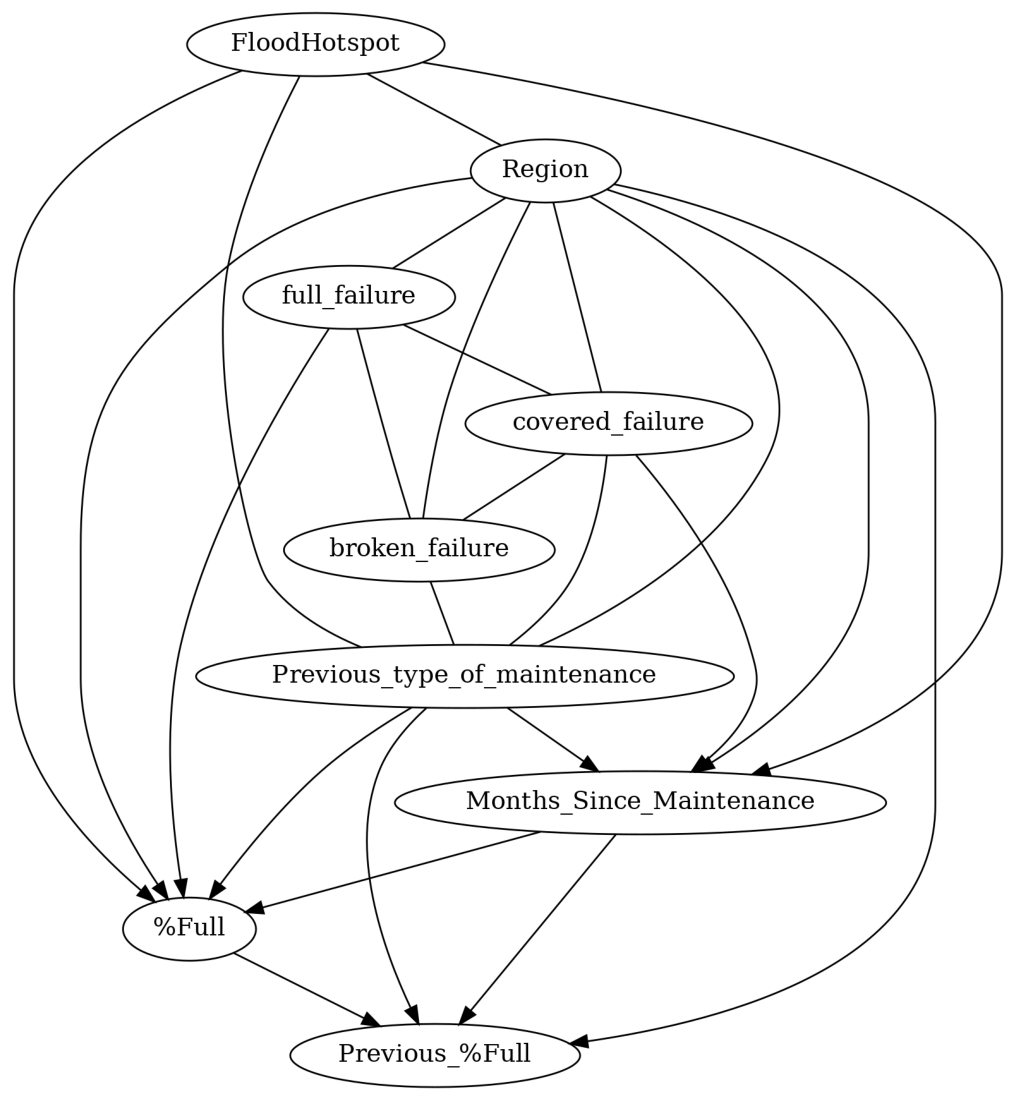

In [421]:
# Visualization using pydot
from causallearn.utils.GraphUtils import GraphUtils
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import io

pyd = GraphUtils.to_pydot(Record['G'],labels=list(struct_data.columns.values))
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.figure(figsize = (20,20))
plt.axis('off')
plt.imshow(img)
plt.show()


# or save the graph
pyd.write_png('GES_algorithm.png')

## PC-Stable

In [334]:
from causallearn.search.ConstraintBased.PC import pc

In [335]:
struct_array = struct_data.to_numpy()

In [336]:
cg = pc(struct_array, alpha=0.05,stable=True, indep_test = "fisherz",verbose= False)

  0%|          | 0/9 [00:00<?, ?it/s]

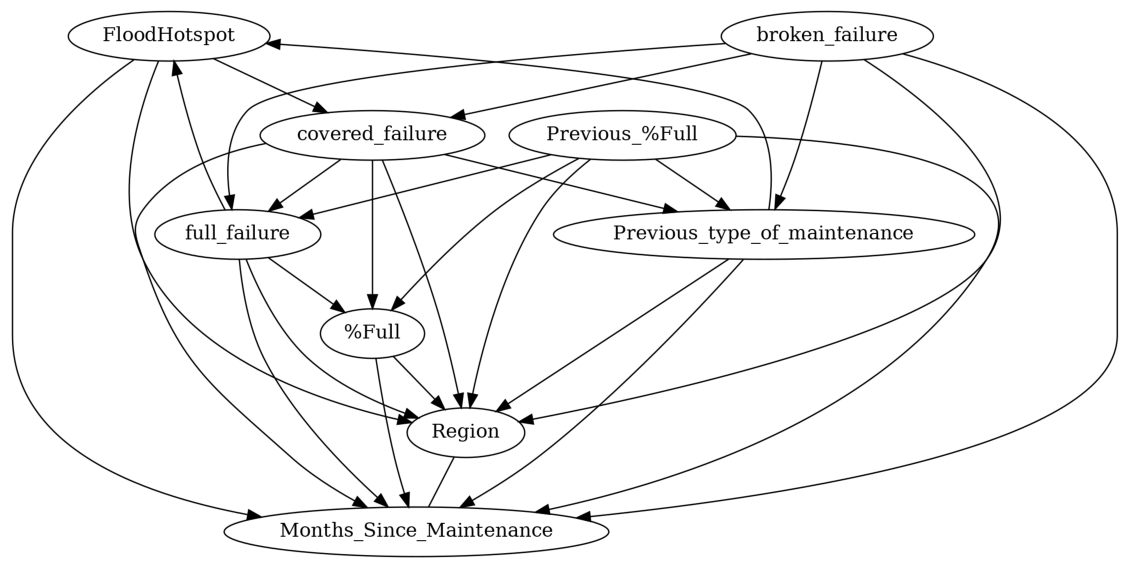

In [367]:
from matplotlib.pyplot import figure
# visualization using pydot
pyd = GraphUtils.to_pydot(cg.G,labels=list(struct_data.columns.values))
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.figure(figsize = (20,20))
plt.axis('off')
plt.imshow(img)
plt.show()
pyd.write_png('PC.png')

## FCI 

In [369]:
from causallearn.search.ConstraintBased.FCI import fci

In [370]:
cg_fci, edges = fci(struct_array, alpha=0.05, indep_test = "fisherz",verbose= False)

  0%|          | 0/9 [00:00<?, ?it/s]

X4 --> X2
X5 --> X4
X6 --> X8


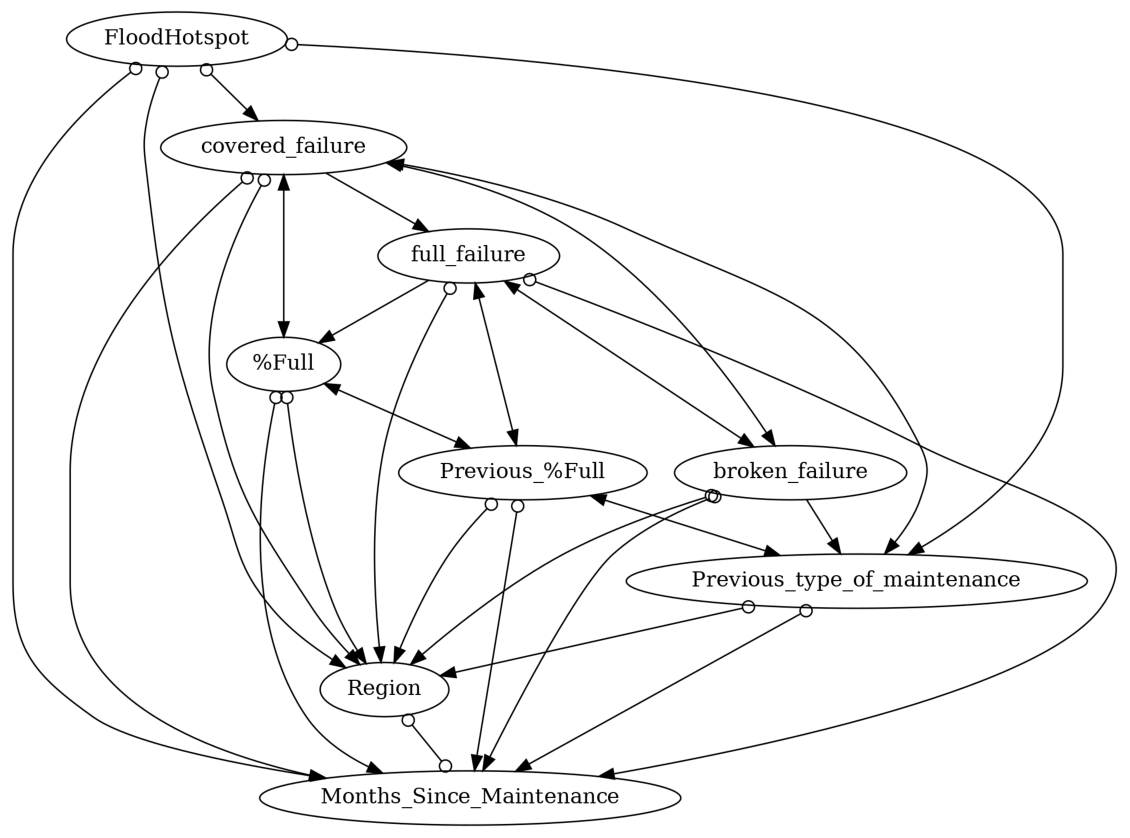

In [386]:
pyd = GraphUtils.to_pydot(cg_fci,labels=list(struct_data.columns.values))
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.figure(figsize = (20,20))
plt.axis('off')
plt.imshow(img)
plt.show()

pyd.write_png('FCI.png')

In [383]:
from causallearn.search.PermutationBased.GRaSP import grasp
score_func="local_score_BDeu"
# or customized parameters
G = grasp(struct_array, score_func)

GRaSP edge count: 23    
GRaSP completed in: 217.32s 


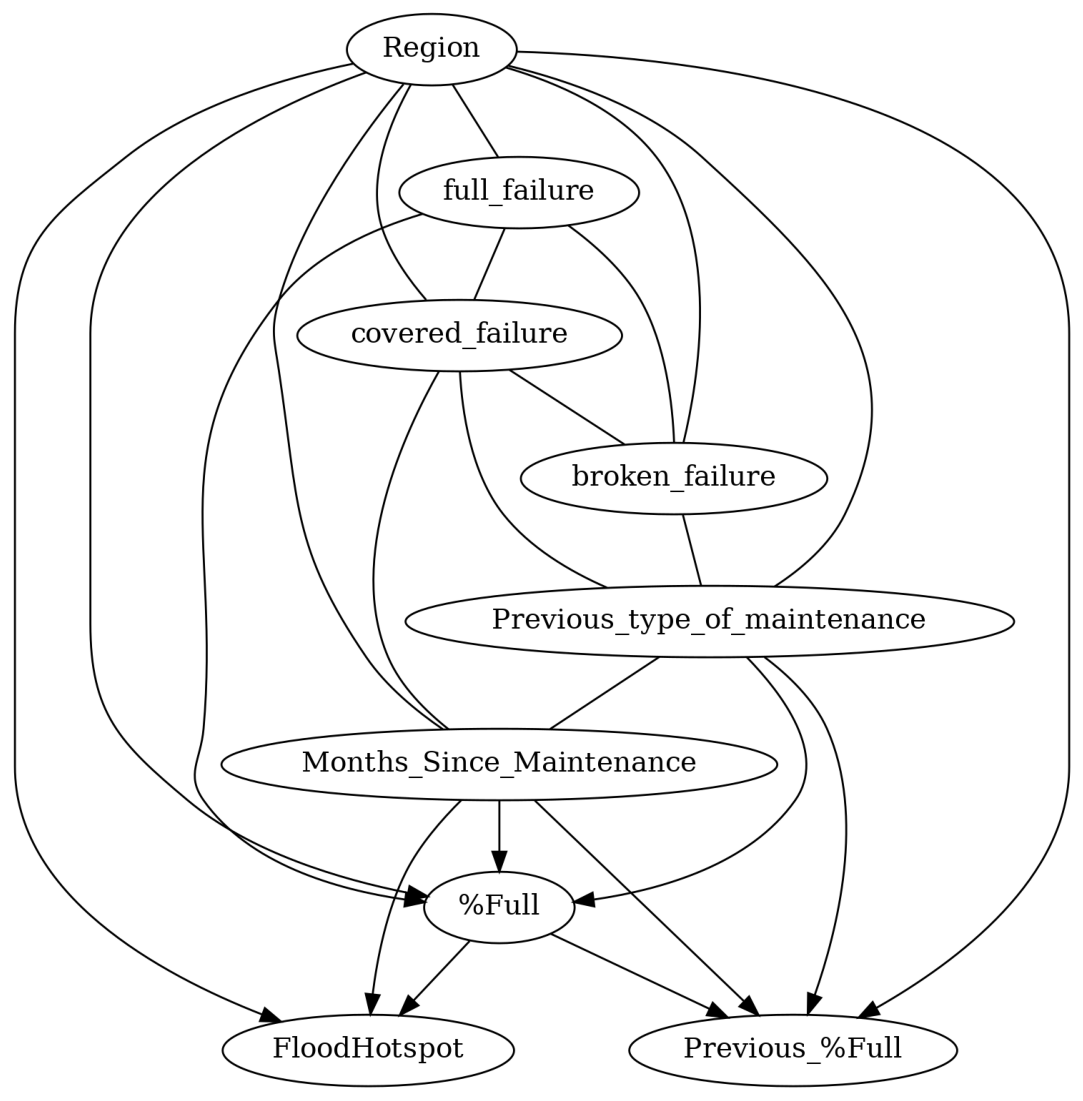

In [387]:
pyd = GraphUtils.to_pydot(G,labels=list(struct_data.columns.values))
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.figure(figsize = (20,20))
plt.axis('off')
plt.imshow(img)
plt.show()
pyd.write_png('GRASP.png')

# Bnlearn

## HillClimbSearch

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bdeu]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


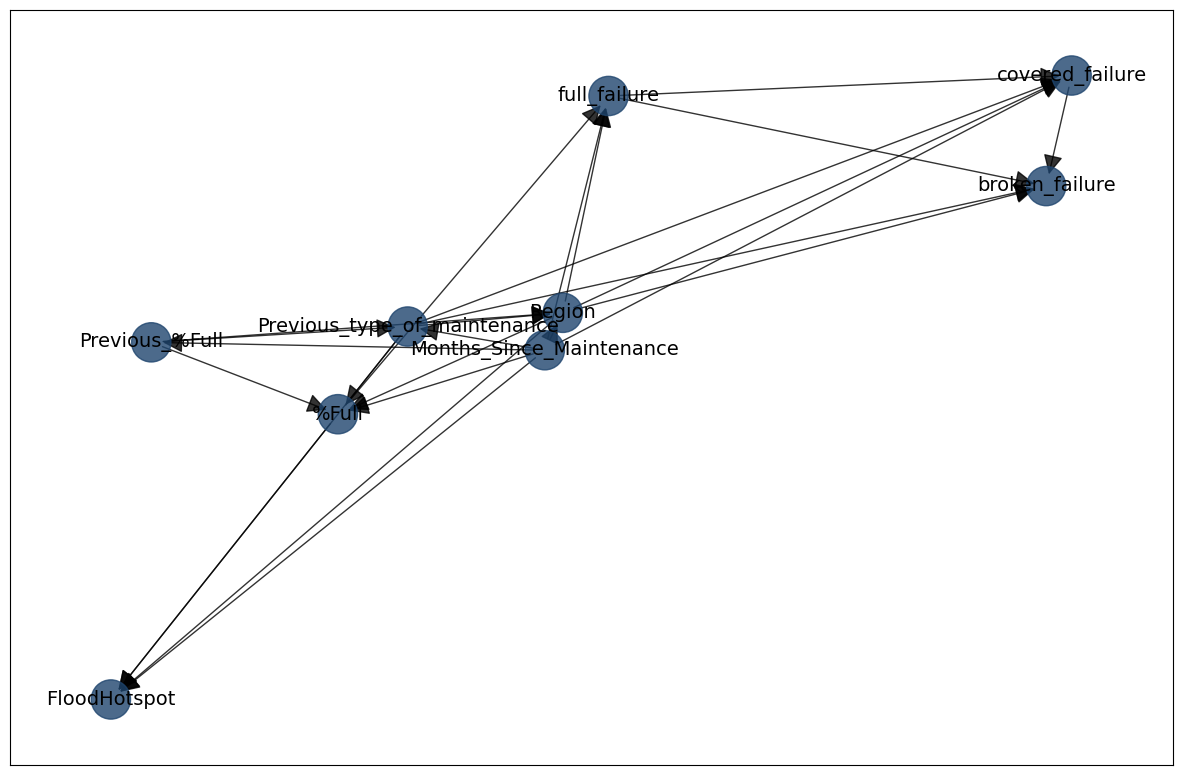

[bnlearn] >Compute edge strength with [chi_square]
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model
[bnlearn] >Existing coordinates from <pos> are used.


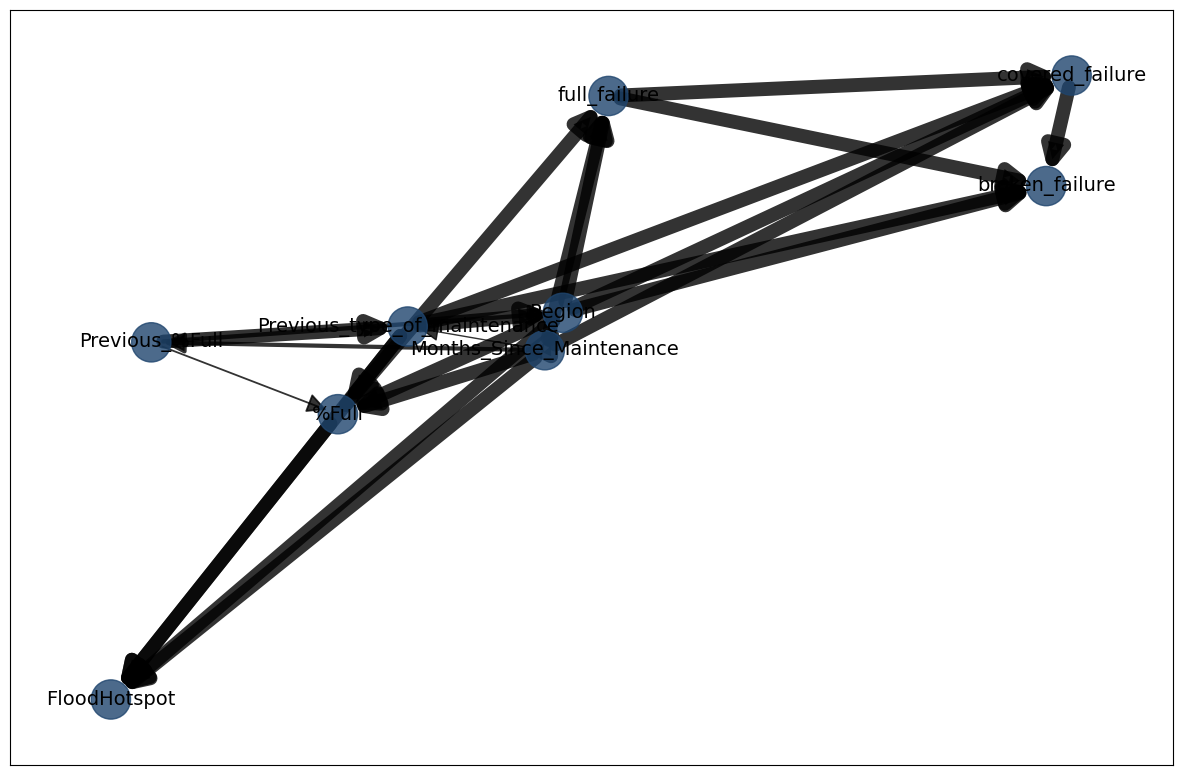

[bnlearn] >Compute edge strength with [chi_square]
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model
[bnlearn] >Existing coordinates from <pos> are used.


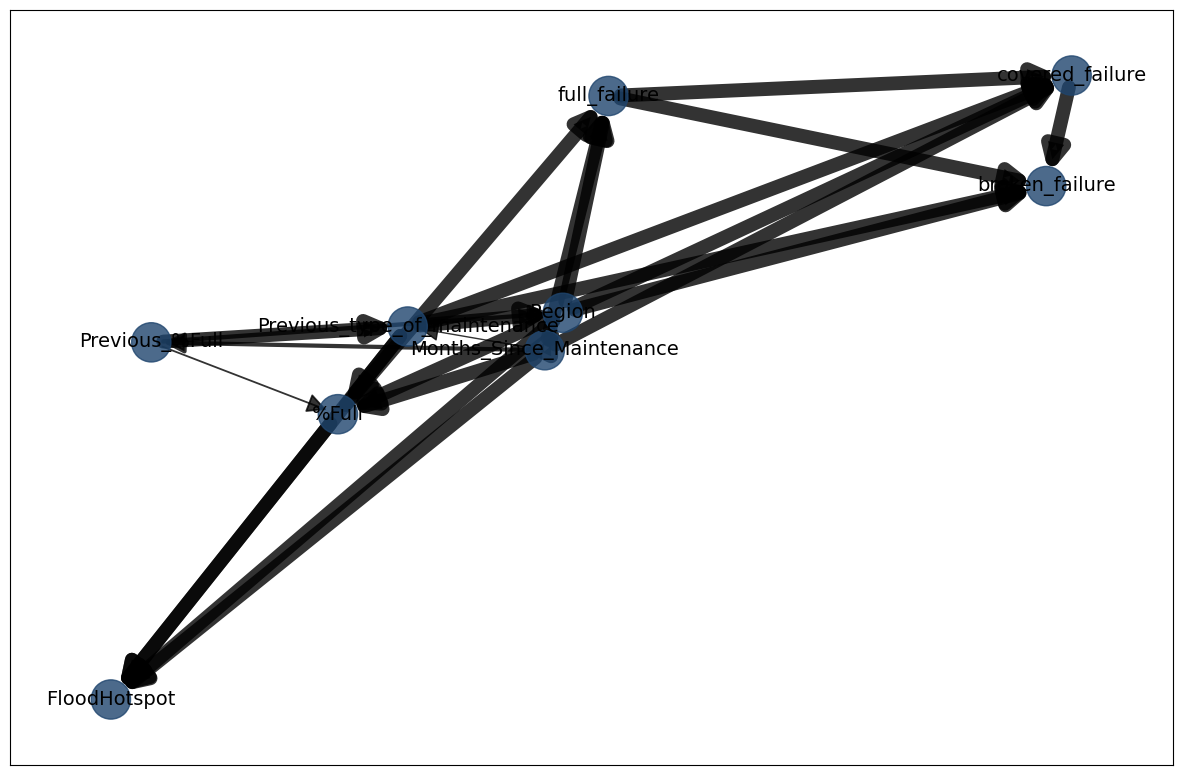

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'FloodHotspot': array([-0.324, -1.   ]),
  '%Full': array([-0.152, -0.265]),
  'Region': array([ 0.019, -0.003]),
  'full_failure': array([0.053, 0.555]),
  'covered_failure': array([0.404, 0.608]),
  'broken_failure': array([0.385, 0.323]),
  'Previous_%Full': array([-0.293, -0.08 ]),
  'Previous_type_of_maintenance': array([-0.099, -0.039]),
  'Months_Since_Maintenance': array([ 0.005, -0.1  ])},
 'G': <networkx.classes.digraph.DiGraph at 0x7fa75c9fb430>,
 'node_properties': {'FloodHotspot': {'node_color': '#1f456e',
   'node_size': 800},
  '%Full': {'node_color': '#1f456e', 'node_size': 800},
  'Region': {'node_color': '#1f456e', 'node_size': 800},
  'full_failure': {'node_color': '#1f456e', 'node_size': 800},
  'covered_failure': {'node_color': '#1f456e', 'node_size': 800},
  'broken_failure': {'node_color': '#1f456e', 'node_size': 800},
  'Previous_%Full': {'node_color': '#1f456e', 'n

In [399]:
# Load library
import bnlearn as bn
# Load example
df = bn.import_example('sprinkler')
# Structure learning
model = bn.structure_learning.fit(struct_data, methodtype='hc', scoretype='bdeu')
G = bn.plot(model)
# Compute edge strength using chi-square independence test and remove (prune) the not-signficant edges
model1 = bn.independence_test(model, struct_data, alpha=0.05, prune=False)
bn.plot(model1, pos=G['pos'])

# Examine the output of the chi-square test. All P values are significant. Nothing is removed.
#    source     target     stat_test        p_value    chi_square    dof
#--  ---------  ---------  -----------  -----------  ------------  -----
# 0  Cloudy     Rain       True         1.08061e-87       394.062      1
# 1  Cloudy     Sprinkler  True         8.38371e-53       233.906      1
# 2  Rain       Wet_Grass  True         3.88651e-64       285.902      1
# 3  Sprinkler  Wet_Grass  True         1.19692e-23       100.478      1

# Plot
# Compute edge strength using chi-square independence test and remove (prune) the not-signficant edges
model3 = bn.independence_test(model, struct_data, alpha=0.05, prune=True)
bn.plot(model3, pos=G['pos'])

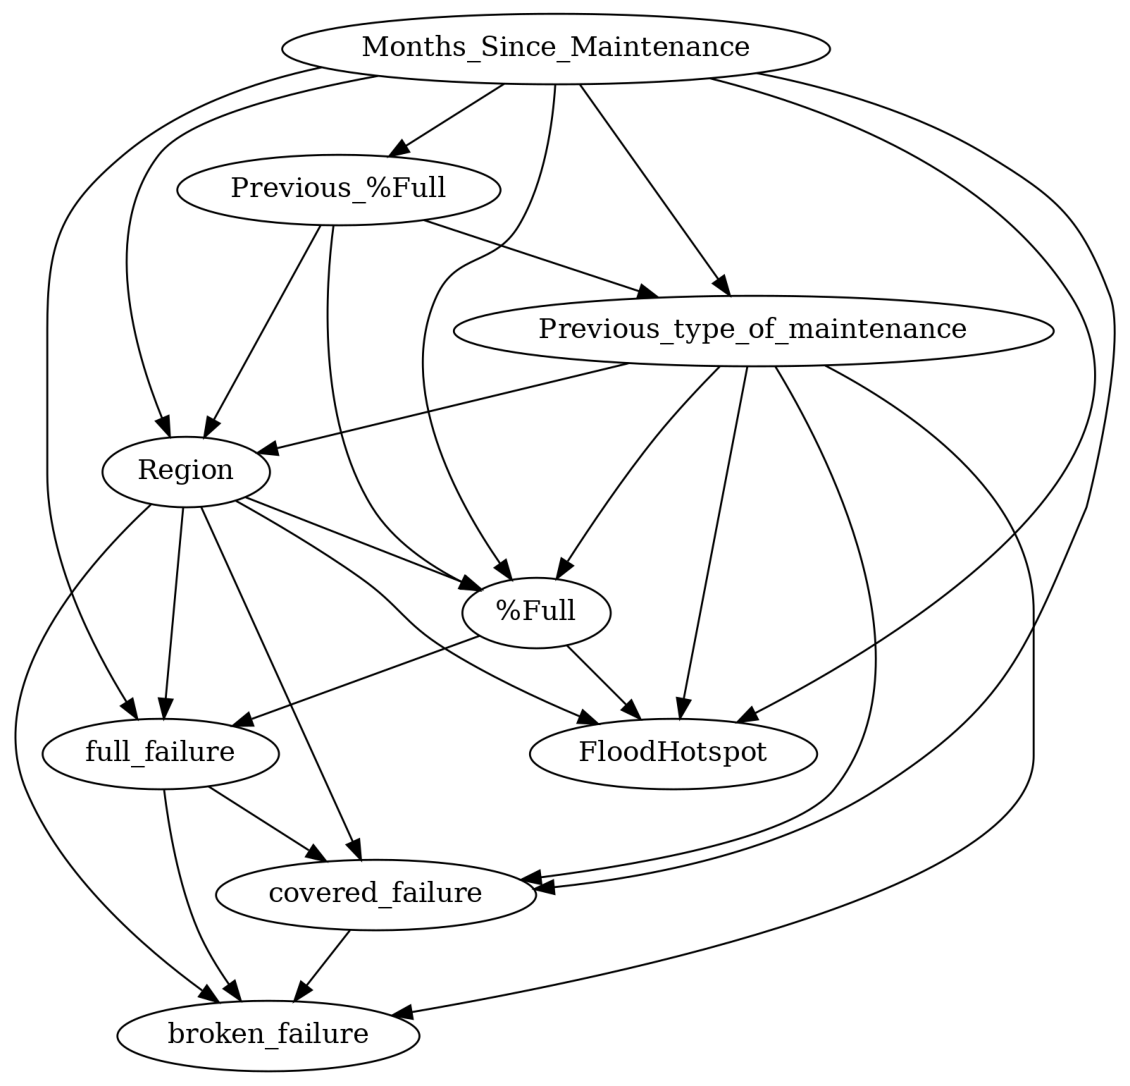

In [424]:
node_names = struct_data.columns
nodes = []
for name in node_names:
    node = GraphNode(name)
    nodes.append(node)
dag = Dag(nodes)

for item in model3["model_edges"]:
    node1 = dag.get_node(item[0])
    node2 = dag.get_node(item[1])
    dag.add_directed_edge(node1, node2)
# visualization using pydot
pyd = GraphUtils.to_pydot(dag,labels=list(struct_data.columns.values))
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.figure(figsize = (20,20))
plt.axis('off')
plt.imshow(img)
plt.show()

pyd.write_png('HillClimb.png')

# Use Background Knowledge

In [351]:
mapped = {}
for index, item in enumerate(struct_data.columns):
    mapped[item]=index
forbidden_edges = [("%Full", "Previous_%Full"),
                    ("FloodHotspot", "Region"),
                    ("Months_Since_Maintenance","Previous_%Full"),
                    ("%Full","Region"),
                    ("Previous_%Full", "Region"),
                    ("broken_failure","Region"),
                    ("covered_failure","Region"),
                    ("full_failure","Region"),
                  ("full_failure","Months_Since_Maintenance"),
                  ("covered_failure","Months_Since_Maintenance"),
                  ("broken_failure","Months_Since_Maintenance"),
                  ("full_failure","Previous_%Full"),
                  ("covered_failure","Previous_%Full"),
                  ("broken_failure","Previous_%Full"),
                  ("covered_failure","FloodHotspot"),
                  ("broken_failure","FloodHotspot"),
                  ("full_failure","FloodHotspot"),
                  ("full_failure","Previous"),
                  ("full_failure","Previous_type_of_maintenance"),
                  ("covered_failure","Previous_type_of_maintenance"),
                  ("broken_failure","Previous_type_of_maintenance"),
                  ("Previous_type_of_maintenance","flood_hotspot")]
output = []
for item in forbidden_edges:
    output.append((mapped[item[0]],mapped[item[1]])

In [353]:
from causallearn.utils.PCUtils.BackgroundKnowledge import BackgroundKnowledge
from causallearn.graph.GraphClass import CausalGraph
cg = CausalGraph(8)
nodes = cg.G.get_nodes()

In [354]:
bk = BackgroundKnowledge()
for item in output:
    bk.add_forbidden_by_node(nodes[item[0]], nodes[item[1]])

In [355]:
struct_array = struct_data.to_numpy()

In [356]:
cg = pc(struct_array, alpha=0.05, indep_test = "fisherz",verbose= False, background_knowledge=bk)

  0%|          | 0/8 [00:00<?, ?it/s]

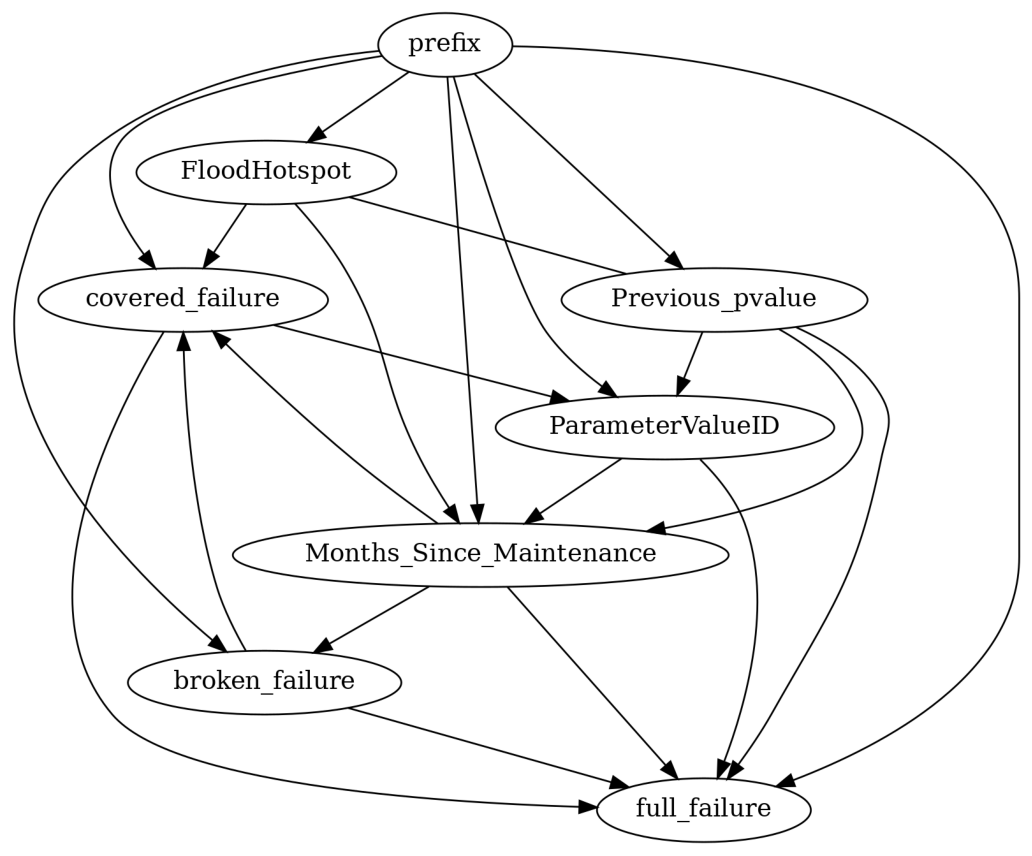

In [357]:
# visualization using pydot
pyd = GraphUtils.to_pydot(cg.G,labels=list(struct_data.columns.values))
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.axis('off')
plt.imshow(img)
plt.show()


pyd.write_png('simple_test.png')

# Learn Parameters

### bnlearn

In [430]:
dag.get_nodes()

In [435]:
print(dag.get_causal_ordering())

[<causallearn.graph.GraphNode.GraphNode object at 0x7fa6a67018e0>, <causallearn.graph.GraphNode.GraphNode object at 0x7fa75cf1c8e0>, <causallearn.graph.GraphNode.GraphNode object at 0x7fa75cf1c970>, <causallearn.graph.GraphNode.GraphNode object at 0x7fa75cf1c370>, <causallearn.graph.GraphNode.GraphNode object at 0x7fa75cf1c580>, <causallearn.graph.GraphNode.GraphNode object at 0x7fa75cf1cf10>, <causallearn.graph.GraphNode.GraphNode object at 0x7fa75cf1c3a0>, <causallearn.graph.GraphNode.GraphNode object at 0x7fa75cf1ce80>, <causallearn.graph.GraphNode.GraphNode object at 0x7fa75cc96310>]


### causallearn

In [441]:
print(dag)

Graph Nodes:
FloodHotspot;%Full;Region;full_failure;covered_failure;broken_failure;Previous_%Full;Previous_type_of_maintenance;Months_Since_Maintenance

Graph Edges:
1. %Full --> FloodHotspot
2. Region --> FloodHotspot
3. Previous_type_of_maintenance --> FloodHotspot
4. Months_Since_Maintenance --> FloodHotspot
5. Region --> %Full
6. %Full --> full_failure
7. Previous_%Full --> %Full
8. Previous_type_of_maintenance --> %Full
9. Months_Since_Maintenance --> %Full
10. Region --> full_failure
11. Region --> covered_failure
12. Region --> broken_failure
13. Previous_%Full --> Region
14. Previous_type_of_maintenance --> Region
15. Months_Since_Maintenance --> Region
16. full_failure --> covered_failure
17. full_failure --> broken_failure
18. Months_Since_Maintenance --> full_failure
19. covered_failure --> broken_failure
20. Previous_type_of_maintenance --> covered_failure
21. Months_Since_Maintenance --> covered_failure
22. Previous_type_of_maintenance --> broken_failure
23. Previous_%Full

In [459]:
edges = []
for edge in dag.get_graph_edges():
    edges.append((edge.get_node1().get_name(),edge.get_node2().get_name()))

In [451]:
print(dag.get_node_map())

{<causallearn.graph.GraphNode.GraphNode object at 0x7fa75cc96310>: 0, <causallearn.graph.GraphNode.GraphNode object at 0x7fa75cf1c580>: 1, <causallearn.graph.GraphNode.GraphNode object at 0x7fa75cf1c370>: 2, <causallearn.graph.GraphNode.GraphNode object at 0x7fa75cf1cf10>: 3, <causallearn.graph.GraphNode.GraphNode object at 0x7fa75cf1c3a0>: 4, <causallearn.graph.GraphNode.GraphNode object at 0x7fa75cf1ce80>: 5, <causallearn.graph.GraphNode.GraphNode object at 0x7fa75cf1c8e0>: 6, <causallearn.graph.GraphNode.GraphNode object at 0x7fa75cf1c970>: 7, <causallearn.graph.GraphNode.GraphNode object at 0x7fa6a67018e0>: 8}


[bnlearn] >bayes DAG created.
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


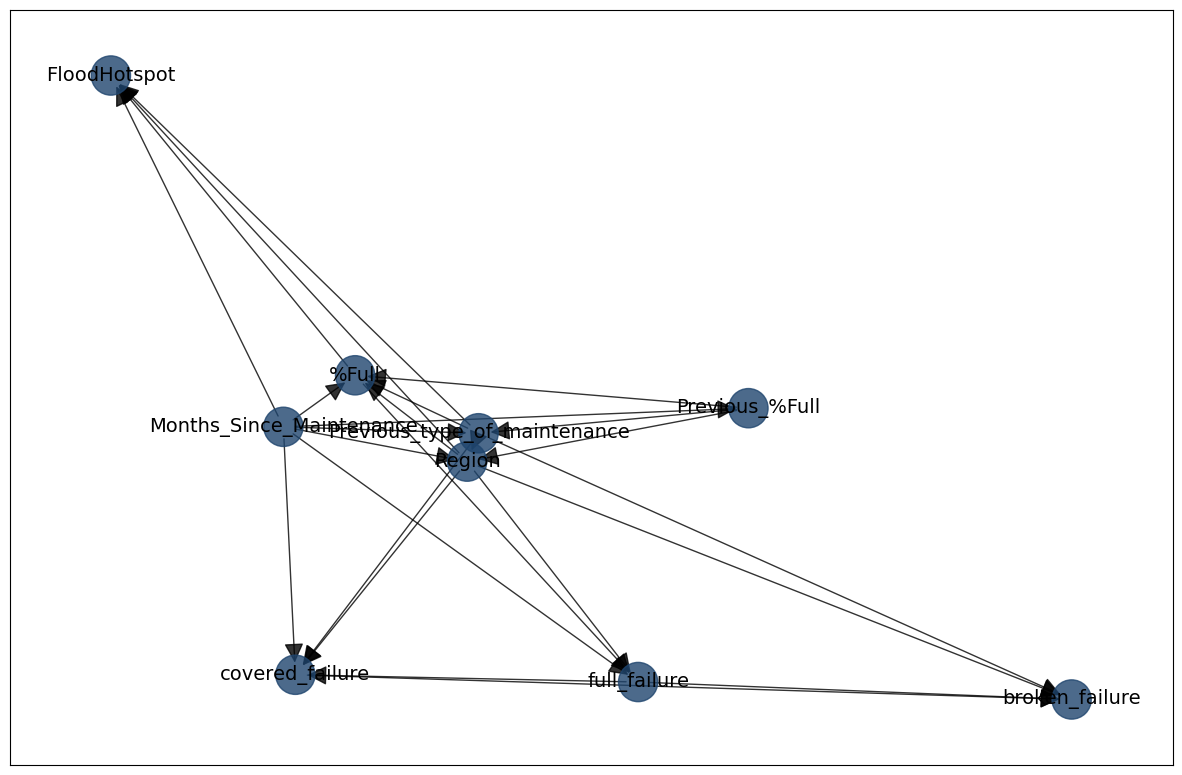

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >CPD of %Full:
+------------------------------+-----+---------------------------------+
| Months_Since_Maintenance     | ... | Months_Since_Maintenance(8)     |
+------------------------------+-----+---------------------------------+
| Previous_%Full               | ... | Previous_%Full(4)               |
+------------------------------+-----+---------------------------------+
| Previous_type_of_maintenance | ... | Previous_type_of_maintenance(1) |
+------------------------------+-----+---------------------------------+
| Region                       | ... | Region(10)                      |
+------------------------------+-----+---------------------------------+
| %Full(0)                     | ... | 0.06711409395973154             |
+------------------------------+-----+---------------------------------+
| %Full(1)                     | ... | 0.3993288590604027              |
+------------------------------+-

In [460]:
#edges = [('A', 'B'), ('A', 'C'), ('A', 'D')]
# Create DAG and store in model
model = bn.make_DAG(edges)
bn.plot(model)
DAG_update = bn.parameter_learning.fit(model, struct_data)

# Create a manually classified causal graph

In [282]:
from causallearn.utils.PCUtils.BackgroundKnowledge import BackgroundKnowledge
from causallearn.graph.GraphClass import CausalGraph
from causallearn.utils.PCUtils.BackgroundKnowledgeOrientUtils import orient_by_background_knowledge
cg = CausalGraph(9)
nodes = cg.G.get_nodes()

In [283]:
struct_data.columns

Index(['FloodHotspot', '%Full', 'Region', 'full_failure', 'covered_failure',
       'broken_failure', 'Previous_%Full', 'Previous_type_of_maintenance',
       'Months_Since_Maintenance'],
      dtype='object')

In [289]:
mapped = {}
for index, item in enumerate(struct_data.columns):
    mapped[item]=index
required_edges = [("Region", "FloodHotspot"),
                  ("Region","Months_Since_Maintenance"),
                  ("Region","full_failure"),
                  ("Region","covered_failure"),
                  ("Region","Previous_%Full"),
                  ("Region","broken_failure"),
                  ("Region","%Full"),
                  ("FloodHotspot","%Full"),
                  ("FloodHotspot","full_failure"),
                  ("FloodHotspot","covered_failure"),
                  ("FloodHotspot","Previous_%Full"),
                  ("FloodHotspot","Previous_type_of_maintenance"),
                  ("FloodHotspot","Months_Since_Maintenance"),
                  ("Months_Since_Maintenance","full_failure"),
                  ("Months_Since_Maintenance","covered_failure"),
                  ("Months_Since_Maintenance","broken_failure"),
                  ("Months_Since_Maintenance","%Full"),
                  ("Previous_%Full","%Full"),
                  ("Previous_%Full","full_failure"),
                  ("Previous_%Full","Months_Since_Maintenance"),
                  ("%Full","full_failure"),
                  ("%Full","covered_failure"),
                  ("Previous_type_of_maintenance","Previous_%Full"),
                  ("Previous_type_of_maintenance","full_failure"),
                  ("Previous_type_of_maintenance","covered_failure"),
                  ("Previous_type_of_maintenance","%Full"),
                  ("Previous_type_of_maintenance","Months_Since_Maintenance"),
                  ("broken_failure","covered_failure")]
output = []
for item in required_edges:
    output.append((mapped[item[0]],mapped[item[1]]))

In [278]:
bk = BackgroundKnowledge()
for item in output:
    bk.add_forbidden_by_node(nodes[item[0]], nodes[item[1]])
orient_by_background_knowledge(cg, bk)

In [309]:
from causallearn.graph.Dag import Dag
from causallearn.graph.Edge import Edge
from causallearn.graph.Endpoint import Endpoint
from causallearn.graph.GraphNode import GraphNode

In [310]:
node_names = struct_data.columns
nodes = []
for name in node_names:
    node = GraphNode(name)
    nodes.append(node)
dag = Dag(nodes)

for item in required_edges:
    node1 = dag.get_node(item[0])
    node2 = dag.get_node(item[1])
    dag.add_directed_edge(node1, node2)

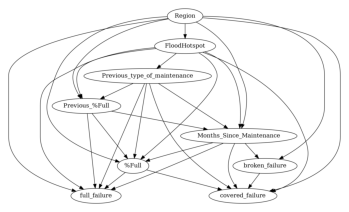

In [312]:
# visualization using pydot
pyd = GraphUtils.to_pydot(dag,labels=list(struct_data.columns.values))
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.axis('off')
plt.imshow(img)
plt.show()

pyd.write_png('human_intuition.png')

## attempt with categorical data

In [49]:
data["Months_Since_maintenance"] = data["Days_Since_Maintenance"].apply(reduce_cardinality_of_dsm)

In [81]:
data = data.drop(columns="Days_Since_Maintenance")

'<i8'

In [79]:
for dtype, name in zip(data.dtypes,data.columns):
    if str(dtype) == 'int64':
        data[name] = data[name].apply(lambda x: "True" if x ==1 else "False")

In [85]:
data["RouteID"] = data["RouteID"].apply(lambda x: "a" + str(x))

In [88]:
data

,FloodHotspot,RouteID,ParameterValueID,prefix,full_failure,covered_failure,broken_failure,Previous_pvalue,Months_Since_maintenance
15458,False,a1101,0-25,NW13,False,False,False,0-25,None
15460,False,a1101,2550,NW13,False,False,False,2550,None
15462,False,a1101,2550,NW13,False,False,False,2550,None
15464,False,a1101,2550,NW13,False,False,False,2550,None
15466,True,a1101,2550,NW13,False,False,False,2550,None
...,...,...,...,...,...,...,...,...,...
551199,False,aM016,7510,NW10,False,False,False,2550,6-9
551200,False,aM016,7510,NW10,False,False,False,2550,6-9
551201,True,aM501,2550,SW21,False,False,False,5075,6-9
551202,True,aM501,2550,SW21,False,False,False,5075,6-9


In [95]:
test_data= data.to_numpy()

In [101]:
np.isnan(["a","b","8"])

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [96]:
from causallearn.search.ConstraintBased.PC import pc

# default parameters
cg = pc(test_data,stable=True)

# or customized parameters
# visualization using pydot
cg.draw_pydot_graph()

# or save the graph
from causallearn.utils.GraphUtils import GraphUtils

pyd = GraphUtils.to_pydot(cg.G)
pyd.write_png('simple_test.png')

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [81]:
# Generate the true causal DAG
true_dag = DAG.scale_free(n_nodes=10, n_edges=15, seed=18)


DATA_PARAMS = {
    'linearity': ['linear', 'nonlinear'], 
    'distribution': {
        'linear': ['gauss', 'exp'],
        'nonlinear': ['quadratic']
    }
}

datasets = {}

for linearity in DATA_PARAMS['linearity']:
    for distr in DATA_PARAMS['distribution'][linearity]:
        
        datasets[f'{linearity}_{distr}'] = IIDSimulation(
            W=true_dag, 
            n=2000, 
            method=linearity, 
            sem_type=distr)
            
print(datasets)

{'linear_gauss': <castle.datasets.simulator.IIDSimulation object at 0x7f45a12bb8b0>, 'linear_exp': <castle.datasets.simulator.IIDSimulation object at 0x7f45a91285b0>, 'nonlinear_quadratic': <castle.datasets.simulator.IIDSimulation object at 0x7f45a1b5f220>}


In [90]:
golem = GOLEM()

************* Current dataset: linear_gauss

Method: PC


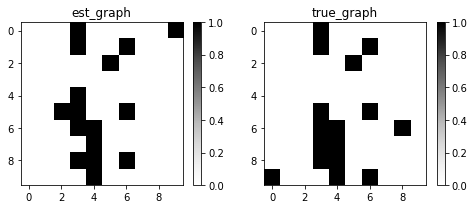

FDR: 0.2
Recall: 0.75
Precision: 0.75
F1 score: 0.75
-------------------------------------------------- 

Method: GES


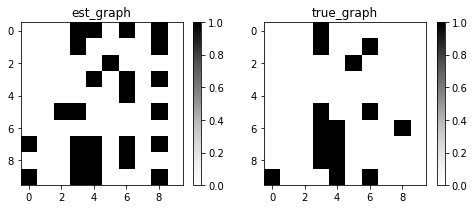

FDR: 0.5833
Recall: 0.625
Precision: 0.3846
F1 score: 0.4762
-------------------------------------------------- 

Method: LiNGAM


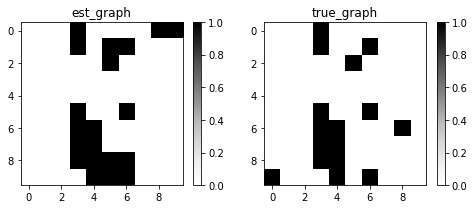

FDR: 0.3
Recall: 0.875
Precision: 0.7
F1 score: 0.7778
-------------------------------------------------- 

Method: GOLEM


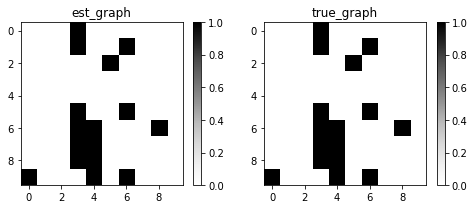

FDR: 0.0
Recall: 1.0
Precision: 1.0
F1 score: 1.0
-------------------------------------------------- 



************* Current dataset: linear_exp

Method: PC


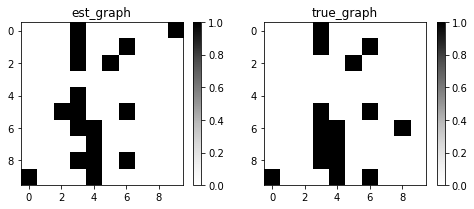

FDR: 0.1875
Recall: 0.8125
Precision: 0.7222
F1 score: 0.7647
-------------------------------------------------- 

Method: GES


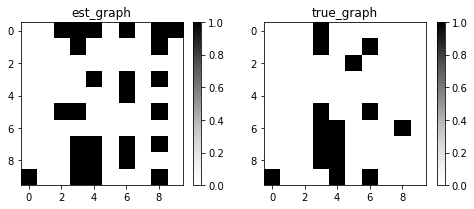

FDR: 0.625
Recall: 0.5625
Precision: 0.3462
F1 score: 0.4286
-------------------------------------------------- 

Method: LiNGAM


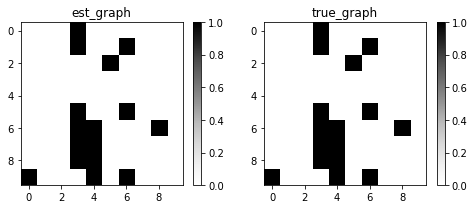

FDR: 0.0
Recall: 1.0
Precision: 1.0
F1 score: 1.0
-------------------------------------------------- 

Method: GOLEM


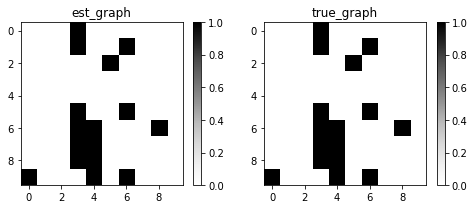

FDR: 0.0
Recall: 1.0
Precision: 1.0
F1 score: 1.0
-------------------------------------------------- 



************* Current dataset: nonlinear_quadratic

Method: PC


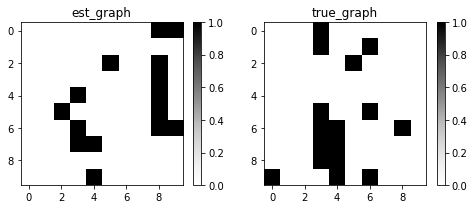

FDR: 0.5714
Recall: 0.375
Precision: 0.4
F1 score: 0.3871
-------------------------------------------------- 

Method: GES


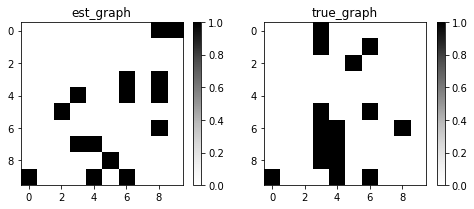

FDR: 0.5714
Recall: 0.375
Precision: 0.4
F1 score: 0.3871
-------------------------------------------------- 

Method: LiNGAM


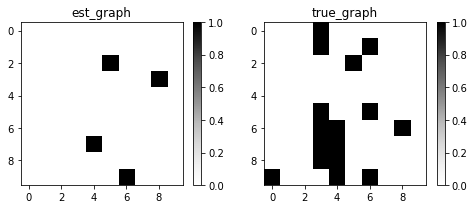

FDR: 0.25
Recall: 0.1875
Precision: 0.75
F1 score: 0.3
-------------------------------------------------- 

Method: GOLEM


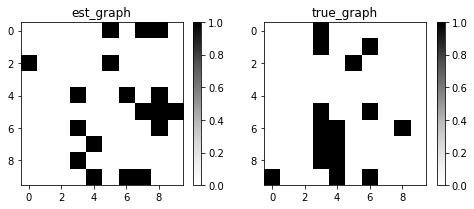

FDR: 0.6111
Recall: 0.4375
Precision: 0.3889
F1 score: 0.4118
-------------------------------------------------- 





In [86]:
methods = OrderedDict({
    'PC': PC,
    'GES': GES,
    'LiNGAM': ICALiNGAM,
    'GOLEM': GOLEM
})


results = {}

# Iterate over datasets
for k, dataset in datasets.items():
    print(f'************* Current dataset: {k}\n')
    X = dataset.X
    
    results[dataset] = {}
    
    # Iterate over algorithms
    for method in methods:
        print(f'Method: {method}')

        # Instantiate the model
        if method == 'GOLEM':
            model = methods[method](num_iter=2.5e4)
        else:
            model = methods[method]()
        
        # Fit the model
        model.learn(X)
        
        # Get the DAG
        pred_dag = model.causal_matrix
              
        # Get n undir edges
        #n_undir = model.get_n_undirected(pred_dag)

        # Plot results
        GraphDAG(pred_dag, true_dag, 'result')

        mt = MetricsDAG(pred_dag, true_dag)
        print(f'FDR: {mt.metrics["fdr"]}')
        print(f'Recall: {mt.metrics["recall"]}')
        print(f'Precision: {mt.metrics["precision"]}')
        print(f'F1 score: {mt.metrics["F1"]}')
        #print(f'No. of undir. edges: {n_undir}\n')
        print('-' * 50, '\n')

        results[dataset][method] = pred_dag      
            
    print('\n') 